In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pprint import pprint
import pyLDAvis
import warnings
import nltk
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np


/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: dis

In [3]:
df  = pd.read_csv('Data/netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.dropna(inplace =True)

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [8]:
features = ['director','cast','country','listed_in','description']
df['combined_features'] = df[features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_features
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"Andy Devonshire Mel Giedroyc, Sue Perkins, Mar..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"Theodore Melfi Melissa McCarthy, Chris O'Dowd,..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,"Christian Schwochow Luna Wedler, Jannis Niewöh..."
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,"S. Shankar Prashanth, Aishwarya Rai Bachchan, ..."


In [10]:
new_features = ['title','combined_features']

In [11]:
new_df = df[new_features]

In [12]:
new_df.head()

,title,combined_features
7,Sankofa,"Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano..."
8,The Great British Baking Show,"Andy Devonshire Mel Giedroyc, Sue Perkins, Mar..."
9,The Starling,"Theodore Melfi Melissa McCarthy, Chris O'Dowd,..."
12,Je Suis Karl,"Christian Schwochow Luna Wedler, Jannis Niewöh..."
24,Jeans,"S. Shankar Prashanth, Aishwarya Rai Bachchan, ..."


In [13]:
new_df.reset_index(inplace=True)

In [14]:
new_df.drop(columns = 'index', inplace = True)

<ipython-input-14-326b50b38126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns = 'index', inplace = True)


In [15]:
new_df.head()

,title,combined_features
0,Sankofa,"Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano..."
1,The Great British Baking Show,"Andy Devonshire Mel Giedroyc, Sue Perkins, Mar..."
2,The Starling,"Theodore Melfi Melissa McCarthy, Chris O'Dowd,..."
3,Je Suis Karl,"Christian Schwochow Luna Wedler, Jannis Niewöh..."
4,Jeans,"S. Shankar Prashanth, Aishwarya Rai Bachchan, ..."


In [16]:
new_df.iloc[3]

title                                                     Je Suis Karl
combined_features    Christian Schwochow Luna Wedler, Jannis Niewöh...
Name: 3, dtype: object

### Tokenizining and cleanup

In [17]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


In [19]:
words = list(sent_to_words(new_df['combined_features']))

In [20]:
#new_df['words'] = list(sent_to_words(new_df['description']))

In [21]:
print(words[0])

['haile', 'gerima', 'kofi', 'ghanaba', 'oyafunmike', 'ogunlano', 'alexandra', 'duah', 'nick', 'medley', 'mutabaruka', 'afemo', 'omilami', 'reggie', 'carter', 'mzuri', 'united', 'states', 'ghana', 'burkina', 'faso', 'united', 'kingdom', 'germany', 'ethiopia', 'dramas', 'independent', 'movies', 'international', 'movies', 'on', 'photo', 'shoot', 'in', 'ghana', 'an', 'american', 'model', 'slips', 'back', 'in', 'time', 'becomes', 'enslaved', 'on', 'plantation', 'and', 'bears', 'witness', 'to', 'the', 'agony', 'of', 'her', 'ancestral', 'past']


### Stop Words

In [22]:
stop_words = stopwords.words('english')
print(stop_words[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [23]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = lemmatizer.lemmatize(sent) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [26]:
stop_words_final = remove_stopwords(words)

In [27]:
new_df['words'] = remove_stopwords(words)

<ipython-input-27-868bac8bb5ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['words'] = remove_stopwords(words)


In [28]:
stop_words_final

[['haile',
  'gerima',
  'kofi',
  'ghanaba',
  'oyafunmike',
  'ogunlano',
  'alexandra',
  'duah',
  'nick',
  'medley',
  'mutabaruka',
  'afemo',
  'omilami',
  'reggie',
  'carter',
  'mzuri',
  'united',
  'states',
  'ghana',
  'burkina',
  'faso',
  'united',
  'kingdom',
  'germany',
  'ethiopia',
  'dramas',
  'independent',
  'movies',
  'international',
  'movies',
  'photo',
  'shoot',
  'ghana',
  'american',
  'model',
  'slips',
  'back',
  'time',
  'becomes',
  'enslaved',
  'plantation',
  'bears',
  'witness',
  'agony',
  'ancestral',
  'past'],
 ['andy',
  'devonshire',
  'mel',
  'giedroyc',
  'sue',
  'perkins',
  'mary',
  'berry',
  'paul',
  'hollywood',
  'united',
  'kingdom',
  'british',
  'tv',
  'shows',
  'reality',
  'tv',
  'talented',
  'batch',
  'amateur',
  'bakers',
  'face',
  'week',
  'competition',
  'whipping',
  'best',
  'dishes',
  'hopes',
  'named',
  'best'],
 ['theodore',
  'melfi',
  'melissa',
  'mccarthy',
  'chris',
  'dowd',
  '

### Lemmatize

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karankurdia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/karankurdia/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Creating Dictionary and Corpus

In [29]:
# Create Dictionary
id2word = corpora.Dictionary(stop_words_final)

In [30]:
id2word

In [31]:
corpus = [id2word.doc2bow(text) for text in stop_words_final]

In [32]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1)]


In [33]:
corpus_word = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [34]:
corpus_word 

[[('afemo', 1),
  ('agony', 1),
  ('alexandra', 1),
  ('american', 1),
  ('ancestral', 1),
  ('back', 1),
  ('bears', 1),
  ('becomes', 1),
  ('burkina', 1),
  ('carter', 1),
  ('dramas', 1),
  ('duah', 1),
  ('enslaved', 1),
  ('ethiopia', 1),
  ('faso', 1),
  ('gerima', 1),
  ('germany', 1),
  ('ghana', 2),
  ('ghanaba', 1),
  ('haile', 1),
  ('independent', 1),
  ('international', 1),
  ('kingdom', 1),
  ('kofi', 1),
  ('medley', 1),
  ('model', 1),
  ('movies', 2),
  ('mutabaruka', 1),
  ('mzuri', 1),
  ('nick', 1),
  ('ogunlano', 1),
  ('omilami', 1),
  ('oyafunmike', 1),
  ('past', 1),
  ('photo', 1),
  ('plantation', 1),
  ('reggie', 1),
  ('shoot', 1),
  ('slips', 1),
  ('states', 1),
  ('time', 1),
  ('united', 2),
  ('witness', 1)]]

### TF-IDF

In [35]:
tfidf = TfidfModel(corpus)

In [36]:
transformed_tfidf = tfidf[corpus]

In [37]:
transformed_tfidf

## Topic modelling

#### Topic modeling is a method for discovering topics that occur in a collection of documents. It can be used for tasks ranging from clustering to dimensionality reduction.

Topic models can be useful in many scenarios, including text classification and trend detection.

A major challenge, however, is to extract high quality, meaningful, and clear topics. Gensim, a Python library, that identifies itself as “topic modelling for humans” helps make our task a little easier.

### Seeing the coherence each topic, and determining the optimal score

In [40]:
# let's loop to extract the best hyperparameters and get the topic model coherence score for each hyperparameter set.
model_coherence_list = []
for topic_num in range(2,20, 1):
    # our LDA model
    topic_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topic_num, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    # coherence model wrapper
    cm = CoherenceModel(model=topic_model, texts= stop_words_final, dictionary=id2word, coherence = 'c_v')
    model_coherence_list.append((topic_num, cm.get_coherence()))
    


In [41]:
print(model_coherence_list)

[(2, 0.2976773465993029), (3, 0.32432387481161595), (4, 0.31817243593529193), (5, 0.38835676706606803), (6, 0.35401275224950407), (7, 0.37940462987101664), (8, 0.3890637101952541), (9, 0.4502610829304532), (10, 0.4241905101334467), (11, 0.4262445099444559), (12, 0.380433884174089), (13, 0.388519275697341), (14, 0.38358826531663404), (15, 0.40835706815802786), (16, 0.412914948535341), (17, 0.3786712593555277), (18, 0.36625056534189804), (19, 0.4024600644587701)]


#### 11 has a a good coherance score

In [42]:
# visualizing the plot

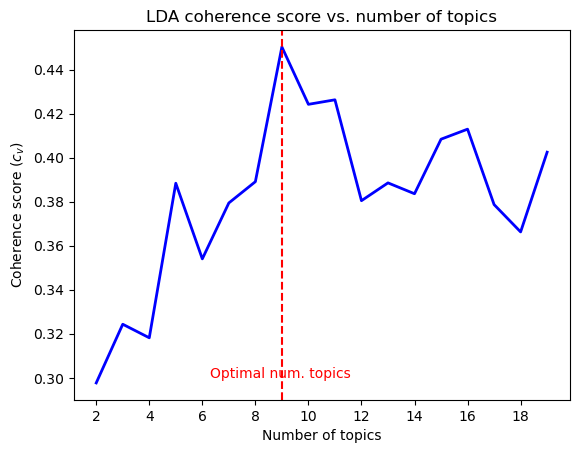

In [43]:
# plot model coherence score vs number of topics
unzipped_coherence_list = list(zip(*model_coherence_list))
plt.plot(unzipped_coherence_list[0], unzipped_coherence_list[1], c = 'b', linewidth = 2 )
plt.axvline(x = 9, c ='r', linestyle = '--')
plt.annotate('Optimal num. topics', xy = (6.3, 0.30), c ='r')
plt.title('LDA coherence score vs. number of topics')
plt.xlabel('Number of topics')
plt.ylabel('Coherence score ($c_v$)')
plt.xticks(np.arange(2,20, 2))
model_image_path = "images\\Modeling\\"
plt.savefig(model_image_path +'LDA_coherence.jpg', dpi = 300, bbox_inches = 'tight')
plt.show()

#### Since we have the optimal topic count we can remodel it

In [38]:
lda_topic_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [39]:
cm1 = CoherenceModel(model=lda_topic_model, texts= stop_words_final, dictionary=id2word, coherence = 'c_v')
coherence =  cm1.get_coherence()

In [40]:
print(coherence)

0.4502610829304532


In [41]:
pprint(lda_topic_model.print_topics())

[(0,
  '0.017*"rob" + 0.010*"maria" + 0.009*"political" + 0.009*"set" + '
  '0.008*"trip" + 0.007*"garcia" + 0.006*"female" + 0.006*"turned" + '
  '0.006*"change" + 0.006*"lloyd"'),
 (1,
  '0.028*"andrew" + 0.011*"learns" + 0.008*"rush" + 0.008*"car" + '
  '0.008*"activist" + 0.007*"hurt" + 0.007*"lau" + 0.007*"six" + 0.006*"sang" '
  '+ 0.005*"alicia"'),
 (2,
  '0.016*"documentaries" + 0.014*"hong" + 0.011*"high" + 0.010*"documentary" + '
  '0.009*"stephen" + 0.007*"faith" + 0.007*"team" + 0.007*"china" + '
  '0.007*"allen" + 0.007*"begins"'),
 (3,
  '0.088*"movies" + 0.041*"dramas" + 0.036*"international" + 0.017*"comedies" '
  '+ 0.016*"independent" + 0.012*"young" + 0.010*"romantic" + 0.008*"life" + '
  '0.007*"man" + 0.007*"two"'),
 (4,
  '0.013*"music" + 0.010*"bill" + 0.010*"musicals" + 0.010*"documentaries" + '
  '0.008*"al" + 0.007*"work" + 0.007*"make" + 0.006*"sean" + 0.006*"mexico" + '
  '0.006*"morgan"'),
 (5,
  '0.038*"united" + 0.033*"states" + 0.019*"family" + 0.014*"jo

In [42]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()



In [45]:
vis = pyLDAvis.gensim_models.prepare(lda_topic_model, corpus, dictionary=id2word)


/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [46]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.177540 -0.360546       1        1  32.417257
5      0.279814  0.098963       2        1  22.012205
7      0.208674  0.204266       3        1  17.574437
4     -0.121009  0.008087       4        1   8.295522
8     -0.107039  0.011766       5        1   6.693297
2     -0.120410  0.005767       6        1   6.680343
0     -0.115164  0.011678       7        1   4.208102
6     -0.103206  0.010322       8        1   1.348800
1     -0.099200  0.009697       9        1   0.770036, topic_info=               Term         Freq        Total Category  logprob  loglift
26           movies  6082.000000  6082.000000  Default  30.0000  30.0000
41           united  3516.000000  3516.000000  Default  29.0000  29.0000
10           dramas  2763.000000  2763.000000  Default  28.0000  28.0000
39           states  2832.000000  2832.000000  Default  27.0000  27.0000
21    international  2470.000000  2470.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
6310           fire     4.595718     5.385608   Topic9  -5.8551   4.7079
2689      continues     4.584639     5.375123   Topic9  -5.8575   4.7074
1708           chau     4.296306     5.086382   Topic9  -5.9224   4.6977
2518          divya     4.073915     4.864294   Topic9  -5.9756   4.6892
3973          field     3.770377     4.560250   Topic9  -6.0530   4.6763

[349 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
7224      6  0.994868     aaron
579       8  0.972560   accused
278       3  0.946633    action
278       5  0.052294    action
3687      9  0.929843  activist
...     ...       ...       ...
1034      4  0.991553      work
836       8  0.924916   working
1012      8  0.915740     wrong
2429      5  0.983961     yadav
143       1  0.999131     young

[339 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 5, 9, 3, 1, 7, 2])

In [55]:
doc_lda = lda_topic_model[corpus]

### wordcloud

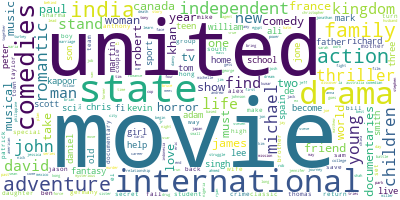

In [48]:
# Import the wordcloud library
from wordcloud import WordCloud
import itertools

# Join the different processed titles together
list_of_words = list(itertools.chain.from_iterable(stop_words_final))
long_string = ','.join(word for word in list_of_words)
long_string

# # Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', collocations = False,  random_state=1)

# # Generate a word cloud
wordcloud.generate(long_string)

# # Visualize the word cloud
wordcloud.to_image()

In [58]:
def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1], reverse = True)) 

In [59]:
doc_num, topic_num, prob, key_words = [], [], [], []
print(lda_topic_model.get_document_topics(corpus))
for n in range(len(df)):
    get_document_topics = lda_topic_model.get_document_topics(corpus[n])
    doc_num.append(n)
    sorted_doc_topics = Sort_Tuple(get_document_topics)
    print(sorted_doc_topics)
    topic_num.append(sorted_doc_topics[0][0])
    prob.append(sorted_doc_topics[0][1])
#wp = lda_topic_model.get_document_topics(corpus)
#topic_keywords = ", ".join([word for word, prop in wp])
df['Doc'] = doc_num
df['Topic'] = topic_num
df['Probability'] = prob



[(7, 0.4396805), (3, 0.29819843), (5, 0.18046452), (4, 0.02688976), (2, 0.021155868), (0, 0.01382495), (8, 0.011367814)]
[(5, 0.4646943), (3, 0.264846), (7, 0.100234464), (2, 0.078514546), (4, 0.0563464), (0, 0.014516138), (8, 0.011951993)]
[(5, 0.44705582), (3, 0.41388988), (7, 0.05010568), (8, 0.031319104), (4, 0.022031425), (2, 0.017323582), (0, 0.011331641)]
[(3, 0.67074364), (2, 0.13212556), (5, 0.07976323), (7, 0.055484496), (4, 0.027492663), (0, 0.014144439), (8, 0.011622109)]
[(3, 0.6783541), (5, 0.11489186), (7, 0.10162054), (8, 0.03707336), (4, 0.025999077), (2, 0.020457188), (0, 0.013387261)]
[(2, 0.23576246), (0, 0.22420269), (5, 0.20909049), (3, 0.14238708), (7, 0.100217946), (4, 0.0746442)]
[(2, 0.2701566), (5, 0.26596746), (7, 0.20541124), (3, 0.18365571), (4, 0.045977578), (0, 0.011841182)]
[(3, 0.47796506), (5, 0.23244913), (7, 0.13974671), (4, 0.044967853), (0, 0.0314947), (8, 0.029610157), (6, 0.024922399), (2, 0.016385358)]
[(2, 0.47247565), (7, 0.17091681), (5, 0.1

[(5, 0.41582948), (4, 0.22511017), (3, 0.18821189), (7, 0.107632026), (2, 0.03709672), (0, 0.010715668)]
[(7, 0.40293276), (5, 0.25126427), (3, 0.20297745), (4, 0.06081347), (2, 0.03626722), (0, 0.030737404)]
[(3, 0.5302524), (5, 0.13168249), (2, 0.10381973), (7, 0.07238762), (0, 0.05762191), (1, 0.043128647), (4, 0.03773788), (8, 0.015958205)]
[(2, 0.33406374), (7, 0.24360693), (3, 0.19778955), (4, 0.1145083), (5, 0.08656151)]
[(7, 0.37680927), (3, 0.2599358), (2, 0.120358184), (4, 0.095051065), (5, 0.08001532), (8, 0.041422296), (0, 0.01637332)]
[(3, 0.4457689), (7, 0.13955945), (5, 0.13221635), (6, 0.09453713), (8, 0.08261511), (4, 0.04791668), (2, 0.042278193), (0, 0.0123070525)]
[(0, 0.40141925), (3, 0.28645352), (5, 0.11743908), (7, 0.08995968), (4, 0.04600251), (2, 0.041131333), (8, 0.010344825)]
[(5, 0.40499976), (3, 0.21189842), (2, 0.102098346), (0, 0.09495853), (7, 0.05854872), (4, 0.053729728), (8, 0.03822534), (6, 0.032361563)]
[(3, 0.51231027), (5, 0.24577633), (7, 0.0959

[(3, 0.6169782), (7, 0.113924436), (5, 0.09714329), (4, 0.08529221), (0, 0.04312497), (2, 0.02243365), (8, 0.012101093)]
[(3, 0.3949908), (4, 0.249507), (5, 0.12263725), (7, 0.0758646), (0, 0.06542144), (2, 0.046357267), (8, 0.037030585)]
[(5, 0.39315355), (3, 0.30962208), (7, 0.16836858), (4, 0.05082043), (8, 0.037028596), (2, 0.019969337), (0, 0.013061378)]
[(3, 0.39943275), (5, 0.282961), (4, 0.13271266), (7, 0.06795751), (0, 0.058726896), (8, 0.032449976), (2, 0.018381119)]
[(3, 0.47466323), (5, 0.23889786), (4, 0.14108874), (7, 0.0735664), (2, 0.042169135), (0, 0.012153946), (8, 0.010015843)]
[(3, 0.3229298), (5, 0.24237663), (7, 0.13707788), (8, 0.13516907), (2, 0.098256916), (4, 0.0351099), (0, 0.018063014)]
[(3, 0.50255966), (4, 0.13853054), (5, 0.13086824), (2, 0.09247557), (7, 0.086632244), (0, 0.02009973), (8, 0.016552165)]
[(3, 0.4573449), (5, 0.17777915), (7, 0.11020664), (0, 0.09942593), (4, 0.05637974), (2, 0.049629733), (6, 0.033989865), (8, 0.011933785)]
[(5, 0.4780481

[(8, 0.35758147), (3, 0.3137794), (5, 0.11187135), (7, 0.0975099), (2, 0.046108), (0, 0.039162956), (4, 0.025834931)]
[(5, 0.30716866), (3, 0.25229502), (7, 0.2482806), (4, 0.06359136), (2, 0.056878224), (0, 0.048349604), (8, 0.013442861)]
[(3, 0.5050928), (5, 0.14902076), (2, 0.11034797), (0, 0.08230736), (4, 0.0689561), (7, 0.04416897), (6, 0.027673915)]
[(3, 0.5383765), (8, 0.17723899), (7, 0.093865305), (5, 0.07666504), (0, 0.04784536), (4, 0.03141445), (2, 0.024719112)]
[(7, 0.40277907), (3, 0.29915568), (5, 0.123002164), (0, 0.0628202), (4, 0.049743615), (8, 0.035124503), (2, 0.019551022)]
[(5, 0.28638074), (4, 0.20284842), (3, 0.18880008), (7, 0.18531652), (2, 0.094214275), (0, 0.017415399), (8, 0.014344396)]
[(3, 0.40247807), (8, 0.28488195), (5, 0.09805055), (7, 0.08307399), (0, 0.07173037), (4, 0.028451022), (2, 0.022379229)]
[(3, 0.45109665), (4, 0.15161803), (5, 0.12533727), (2, 0.09524472), (7, 0.08430021), (0, 0.0715968), (8, 0.011937761)]
[(7, 0.4475577), (3, 0.16951676)

[(3, 0.42664322), (7, 0.27549326), (5, 0.13416551), (4, 0.07136715), (0, 0.057740502), (2, 0.017849937)]
[(7, 0.32480314), (3, 0.30483392), (5, 0.16803673), (2, 0.07591841), (4, 0.060054887), (6, 0.045274273), (0, 0.010273546)]
[(8, 0.27076024), (3, 0.24992195), (7, 0.18529825), (5, 0.10670514), (0, 0.061951492), (4, 0.049066022), (2, 0.043858726), (6, 0.029540328)]
[(8, 0.3471932), (3, 0.29362658), (5, 0.17768033), (7, 0.05097755), (0, 0.049627624), (4, 0.039437428), (6, 0.023538845), (2, 0.015579267)]
[(5, 0.3529176), (7, 0.27335337), (4, 0.12670173), (3, 0.11783195), (2, 0.08130583), (0, 0.03231325)]
[(5, 0.30340886), (0, 0.20544104), (3, 0.175182), (7, 0.17218901), (4, 0.04397062), (2, 0.03939733), (8, 0.031363547), (6, 0.02645121)]
[(5, 0.38796097), (7, 0.21936686), (3, 0.20193145), (4, 0.08604743), (0, 0.043721687), (2, 0.030895183), (8, 0.024625814)]
[(7, 0.33250624), (5, 0.25220028), (3, 0.2267979), (4, 0.10243842), (2, 0.04750775), (0, 0.025884606)]
[(7, 0.33659992), (5, 0.275

[(3, 0.4263214), (5, 0.3133462), (7, 0.12791122), (2, 0.05900275), (4, 0.03263436), (0, 0.016757812), (8, 0.013776708)]
[(3, 0.5470393), (4, 0.116696596), (2, 0.11091145), (7, 0.09108563), (5, 0.08151868), (8, 0.033773907), (0, 0.011763516)]
[(5, 0.27962884), (3, 0.25950673), (7, 0.15522832), (4, 0.14313345), (2, 0.12686713), (0, 0.023982162)]
[(5, 0.29567736), (3, 0.23407356), (7, 0.20038721), (4, 0.123866156), (2, 0.057297405), (0, 0.05246351), (8, 0.02976595)]
[(3, 0.6379049), (2, 0.1251042), (5, 0.09313698), (7, 0.054006852), (1, 0.031638127), (4, 0.027278401), (0, 0.014022339), (8, 0.011538683)]
[(5, 0.28789303), (7, 0.26094213), (3, 0.22491412), (4, 0.094160445), (2, 0.082966015), (0, 0.033051416)]
[(3, 0.26211047), (0, 0.20593731), (8, 0.19037917), (5, 0.13777007), (7, 0.09214286), (4, 0.0436621), (2, 0.03889034), (6, 0.026537037)]
[(7, 0.36509427), (5, 0.33954838), (3, 0.09538655), (2, 0.08368958), (0, 0.033543162), (8, 0.031455476), (1, 0.024735538), (4, 0.022168014)]
[(7, 0.2

In [61]:
len(lda_topic_model.show_topics())

9

In [62]:
lda_topic_model.show_topics(2)[0][1].split('"')[1::2]

['andrew',
 'learns',
 'rush',
 'car',
 'activist',
 'hurt',
 'lau',
 'six',
 'sang',
 'alicia']

In [63]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_features,Doc,Topic,Probability
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano...",0,7,0.439680
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"Andy Devonshire Mel Giedroyc, Sue Perkins, Mar...",1,5,0.464694
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"Theodore Melfi Melissa McCarthy, Chris O'Dowd,...",2,5,0.447056
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,"Christian Schwochow Luna Wedler, Jannis Niewöh...",3,3,0.670744
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,"S. Shankar Prashanth, Aishwarya Rai Bachchan, ...",4,3,0.678354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,"Majid Al Ansari Ali Suliman, Saleh Bakri, Yasa...",5327,3,0.559239
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","David Fincher Mark Ruffalo, Jake Gyllenhaal, R...",5328,7,0.334761
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"Ruben Fleischer Jesse Eisenberg, Woody Harrels...",5329,5,0.298970
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","Peter Hewitt Tim Allen, Courteney Cox, Chevy C...",5330,5,0.368248


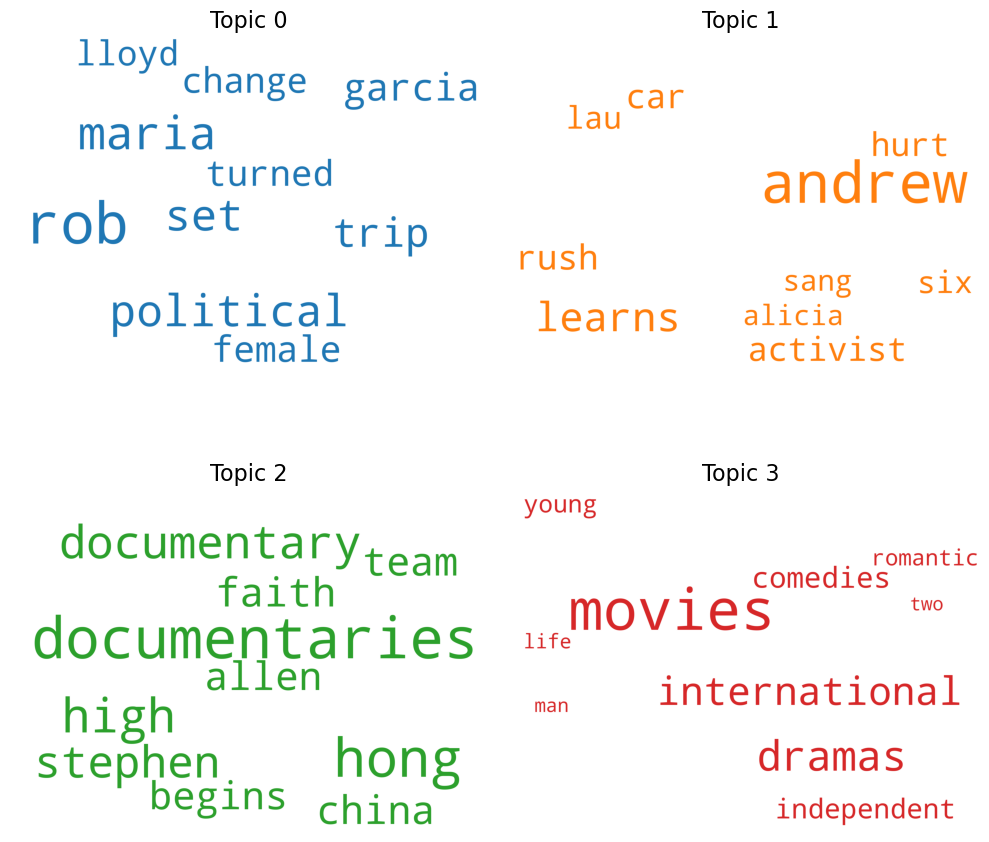

In [130]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_topic_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

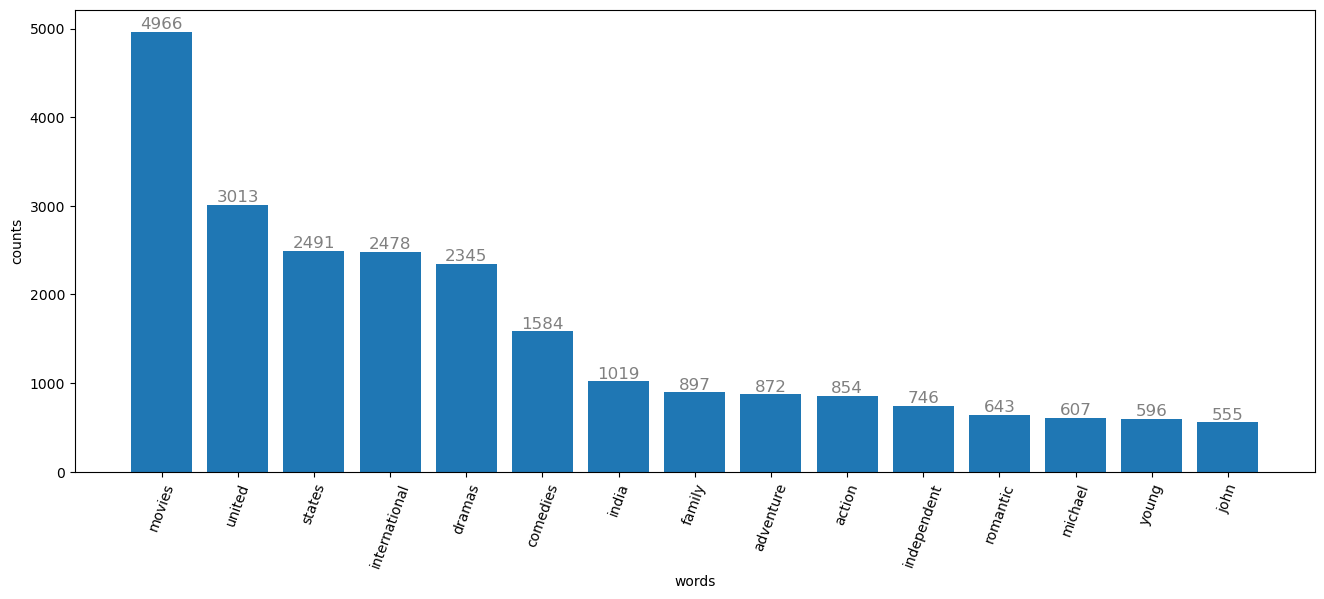

In [140]:
import operator


word_freq = []
word_list = []
count_dict = {}
for n in id2word.values():
    count_dict[n] = list_of_words.count(n)
sorted_dict = sorted(count_dict.items(), key=operator.itemgetter(1), reverse=True)[0:15]

plt.figure(figsize=(16,6))
plt.bar(range(len(sorted_dict)), [val[1] for val in sorted_dict], align='center')
plt.xticks(range(len(sorted_dict)), [val[0] for val in sorted_dict])
plt.xticks(rotation=70)
plt.xlabel('words')
plt.ylabel('counts')

# setting data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='grey', ha='center', va='bottom')
    
plt.show()

In [66]:
doc_num, topic_num, prob, key_words = [], [], [], []
print(lda_topic_model.get_document_topics(corpus))
for n in range(len(df)):
    get_document_topics = lda_topic_model.get_document_topics(corpus[n])
    doc_num.append(n)
    sorted_doc_topics = Sort_Tuple(get_document_topics)
    print(sorted_doc_topics)
    topic_num.append(sorted_doc_topics[0][0])
    prob.append(sorted_doc_topics[0][1])
#wp = lda_topic_model.get_document_topics(corpus)
#topic_keywords = ", ".join([word for word, prop in wp])
new_df['Doc'] = doc_num
new_df['Topic'] = topic_num
new_df['Probability'] = prob


[(7, 0.43969235), (3, 0.2981992), (5, 0.18045186), (4, 0.026889771), (2, 0.021155875), (0, 0.013824954), (8, 0.011367817)]
[(5, 0.4646945), (3, 0.264846), (7, 0.100234255), (2, 0.078514546), (4, 0.0563464), (0, 0.014516138), (8, 0.011951993)]
[(5, 0.44705296), (3, 0.41389), (7, 0.05010838), (8, 0.031319108), (4, 0.022031425), (2, 0.017323582), (0, 0.011331641)]
[(3, 0.67074275), (2, 0.13212556), (5, 0.07976387), (7, 0.055484723), (4, 0.027492663), (0, 0.014144439), (8, 0.011622109)]
[(3, 0.6783542), (5, 0.11489172), (7, 0.10162053), (8, 0.03707335), (4, 0.025999073), (2, 0.020457186), (0, 0.01338726)]
[(2, 0.23576248), (0, 0.2242027), (5, 0.20908806), (3, 0.1423873), (7, 0.100220166), (4, 0.0746442)]
[(2, 0.2701566), (5, 0.26596844), (7, 0.20541096), (3, 0.183655), (4, 0.045977578), (0, 0.011841182)]
[(3, 0.47796574), (5, 0.2324473), (7, 0.13974787), (4, 0.044967867), (0, 0.031494696), (8, 0.029610159), (6, 0.024922395), (2, 0.016385356)]
[(2, 0.47247565), (7, 0.17091066), (5, 0.153061

[(3, 0.6489976), (5, 0.10355277), (8, 0.07569033), (4, 0.062044743), (7, 0.05950851), (2, 0.024375943), (0, 0.01594171)]
[(8, 0.44093743), (3, 0.28045982), (7, 0.100760765), (5, 0.06653655), (4, 0.059567332), (2, 0.035231363), (0, 0.010235084)]
[(3, 0.48739445), (8, 0.35219383), (5, 0.048341125), (7, 0.038914174), (0, 0.03062364), (4, 0.020226229), (2, 0.015917901)]
[(3, 0.402216), (8, 0.38871336), (5, 0.06953373), (4, 0.049950164), (7, 0.04866398), (2, 0.019912468), (0, 0.013027869)]
[(3, 0.58260095), (5, 0.14555036), (7, 0.08047745), (2, 0.048322305), (0, 0.04114436), (8, 0.038477555), (1, 0.03039294), (4, 0.027714284)]
[(5, 0.3108111), (7, 0.23506315), (3, 0.19346948), (4, 0.17257258), (8, 0.041150752), (2, 0.022827305), (0, 0.0149381105)]
[(3, 0.4859858), (8, 0.14452194), (5, 0.13396516), (7, 0.11247189), (0, 0.040342413), (1, 0.029935017), (4, 0.026597619), (2, 0.020927172)]
[(3, 0.39311397), (0, 0.32561758), (5, 0.13830042), (4, 0.06656218), (7, 0.04259156), (2, 0.0174432)]
[(5, 

[(3, 0.36828032), (5, 0.25529742), (2, 0.11406747), (7, 0.11312358), (4, 0.095363125), (0, 0.036247186), (8, 0.0101121)]
[(7, 0.24083579), (3, 0.2396963), (5, 0.22282317), (4, 0.19001397), (0, 0.07430551), (2, 0.016588205)]
[(7, 0.4522762), (5, 0.21417974), (3, 0.17319134), (2, 0.056767873), (6, 0.038125366), (4, 0.031820253), (0, 0.016383698), (8, 0.0135)]
[(5, 0.42082426), (3, 0.28093094), (0, 0.08519218), (4, 0.072419986), (7, 0.055683825), (2, 0.043079697), (8, 0.034240525)]
[(3, 0.4848127), (5, 0.27062234), (7, 0.073543765), (4, 0.07257067), (2, 0.043352526), (0, 0.03698959), (8, 0.010507652)]
[(3, 0.34595302), (8, 0.24407744), (5, 0.16207644), (4, 0.087156124), (7, 0.08461228), (0, 0.04415183), (2, 0.022841739)]
[(3, 0.5135652), (5, 0.14931034), (8, 0.10594177), (7, 0.059154175), (2, 0.054725323), (0, 0.04655084), (6, 0.03638974), (4, 0.03073985)]
[(3, 0.5653154), (7, 0.14509338), (5, 0.11972317), (4, 0.084587984), (2, 0.03767186), (0, 0.032030135)]
[(7, 0.2588076), (3, 0.2560876

[(8, 0.4093649), (3, 0.18129517), (5, 0.1724162), (7, 0.13326326), (4, 0.044881575), (2, 0.040121645), (0, 0.011577683)]
[(3, 0.362453), (8, 0.30725625), (7, 0.097073145), (5, 0.08069874), (4, 0.06548217), (0, 0.03641125), (1, 0.02688183), (2, 0.01896862)]
[(3, 0.38467482), (5, 0.16773818), (4, 0.14188316), (7, 0.12929708), (2, 0.104888126), (0, 0.048069153), (8, 0.0134694595)]
[(8, 0.31684232), (3, 0.2478726), (5, 0.19431712), (7, 0.07387125), (0, 0.06356292), (4, 0.050511245), (2, 0.04502946)]
[(3, 0.59826463), (5, 0.13201925), (4, 0.08901791), (7, 0.057972193), (0, 0.04512857), (8, 0.045032315), (2, 0.023274912)]
[(3, 0.70124584), (5, 0.10649093), (7, 0.0635566), (2, 0.057016965), (4, 0.031835027), (0, 0.016379043), (8, 0.0134741375)]
[(7, 0.34477207), (3, 0.26307848), (5, 0.16903567), (4, 0.1264247), (0, 0.04800423), (2, 0.024956552), (8, 0.013706511)]
[(5, 0.3487671), (3, 0.21008989), (7, 0.14866945), (2, 0.11881552), (4, 0.10493496), (0, 0.031931415), (1, 0.023646144)]
[(5, 0.246

[(5, 0.30606812), (7, 0.2250824), (3, 0.18353783), (4, 0.15345366), (2, 0.052478775), (0, 0.046905324), (6, 0.022381034)]
[(5, 0.2722136), (7, 0.22158171), (3, 0.21021123), (4, 0.11081787), (2, 0.08811705), (0, 0.04634909), (6, 0.04080231)]
[(7, 0.34860528), (3, 0.21818112), (5, 0.144776), (0, 0.108291365), (4, 0.0709908), (6, 0.053037014), (1, 0.02679351), (2, 0.019278727), (8, 0.010046213)]
[(8, 0.3187634), (3, 0.29248735), (5, 0.10747502), (4, 0.07968025), (6, 0.058886755), (7, 0.051442146), (2, 0.047590505), (1, 0.029909482), (0, 0.013765085)]
[(7, 0.42235297), (3, 0.22879978), (5, 0.15983798), (2, 0.1147124), (4, 0.035090286), (0, 0.016094847), (8, 0.013249786)]
[(5, 0.37363267), (3, 0.29027116), (7, 0.16191828), (4, 0.124950625), (2, 0.018967466), (0, 0.012412392), (8, 0.010228601)]
[(5, 0.36965713), (7, 0.28952003), (4, 0.12534687), (2, 0.09989145), (3, 0.08948883), (0, 0.010692633)]
[(7, 0.35994324), (3, 0.3119372), (4, 0.11292126), (5, 0.10111965), (0, 0.056662887), (2, 0.0296

[(3, 0.50185484), (5, 0.12904024), (7, 0.12257064), (2, 0.089006685), (0, 0.07095109), (8, 0.032674618), (6, 0.028126223), (4, 0.02306621)]
[(5, 0.3027286), (2, 0.2264129), (4, 0.19018316), (7, 0.1287598), (3, 0.11461342), (0, 0.025086764)]
[(4, 0.30990642), (5, 0.22587745), (3, 0.20504144), (7, 0.1475925), (0, 0.0554813), (2, 0.03999244)]
[(7, 0.45287618), (3, 0.2835124), (5, 0.1523419), (6, 0.04991513), (4, 0.021592174), (2, 0.01698747), (0, 0.011104976)]
[(7, 0.2588073), (5, 0.23758014), (3, 0.21547808), (4, 0.17753528), (2, 0.039077036), (0, 0.033205047), (1, 0.024735296)]
[(5, 0.39352304), (3, 0.19105051), (7, 0.1563784), (4, 0.15545672), (2, 0.057543088), (8, 0.028941143), (0, 0.010606213)]
[(5, 0.3767436), (7, 0.20942394), (4, 0.12921725), (0, 0.10819044), (3, 0.09603015), (2, 0.054342944), (8, 0.021496927)]
[(5, 0.47650862), (7, 0.22274569), (3, 0.15280862), (4, 0.05901788), (2, 0.041170344), (0, 0.022362242), (8, 0.020725926)]
[(5, 0.49832883), (7, 0.22059126), (3, 0.14150879)

<ipython-input-66-9b29cbed0e21>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Doc'] = doc_num
<ipython-input-66-9b29cbed0e21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Topic'] = topic_num
<ipython-input-66-9b29cbed0e21>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [67]:
new_df.head()

,title,combined_features,words,Doc,Topic,Probability
0,Sankofa,"Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano...","[haile, gerima, kofi, ghanaba, oyafunmike, ogu...",0,7,0.439692
1,The Great British Baking Show,"Andy Devonshire Mel Giedroyc, Sue Perkins, Mar...","[andy, devonshire, mel, giedroyc, sue, perkins...",1,5,0.464694
2,The Starling,"Theodore Melfi Melissa McCarthy, Chris O'Dowd,...","[theodore, melfi, melissa, mccarthy, chris, do...",2,5,0.447053
3,Je Suis Karl,"Christian Schwochow Luna Wedler, Jannis Niewöh...","[christian, schwochow, luna, wedler, jannis, n...",3,3,0.670743
4,Jeans,"S. Shankar Prashanth, Aishwarya Rai Bachchan, ...","[shankar, prashanth, aishwarya, rai, bachchan,...",4,3,0.678354


## Recommendation

### Tokenization

In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karankurdia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens


In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karankurdia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
stop_words = stopwords.words('english')
print(stop_words[0:5])

['i', 'me', 'my', 'myself', 'we']


In [72]:
def first_step_normalizer(doc):
    # filters for alphabetic (no punctuation or numbers) and filters out stop words. 
    # lower cases all tokens
    norm_text = [x.lower() for x in word_tokenize(doc) if ((x.isalpha()) & (x not in stop_words)) ]
    return norm_text

In [73]:
new_df['combined_features'] = new_df['combined_features'].apply(first_step_normalizer)
new_df

<ipython-input-73-6f8e291a66b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['combined_features'] = new_df['combined_features'].apply(first_step_normalizer)


,title,combined_features,words,Doc,Topic,Probability
0,Sankofa,"[haile, gerima, kofi, ghanaba, oyafunmike, ogu...","[haile, gerima, kofi, ghanaba, oyafunmike, ogu...",0,7,0.439692
1,The Great British Baking Show,"[andy, devonshire, mel, giedroyc, sue, perkins...","[andy, devonshire, mel, giedroyc, sue, perkins...",1,5,0.464694
2,The Starling,"[theodore, melfi, melissa, mccarthy, chris, ke...","[theodore, melfi, melissa, mccarthy, chris, do...",2,5,0.447053
3,Je Suis Karl,"[christian, schwochow, luna, wedler, jannis, n...","[christian, schwochow, luna, wedler, jannis, n...",3,3,0.670743
4,Jeans,"[shankar, prashanth, aishwarya, rai, bachchan,...","[shankar, prashanth, aishwarya, rai, bachchan,...",4,3,0.678354
...,...,...,...,...,...,...
5327,Zinzana,"[majid, al, ansari, ali, suliman, saleh, bakri...","[majid, al, ansari, ali, suliman, saleh, bakri...",5327,3,0.559239
5328,Zodiac,"[david, fincher, mark, ruffalo, jake, gyllenha...","[david, fincher, mark, ruffalo, jake, gyllenha...",5328,7,0.334765
5329,Zombieland,"[ruben, fleischer, jesse, eisenberg, woody, ha...","[ruben, fleischer, jesse, eisenberg, woody, ha...",5329,5,0.298968
5330,Zoom,"[peter, hewitt, tim, allen, courteney, cox, ch...","[peter, hewitt, tim, allen, courteney, cox, ch...",5330,5,0.368252


In [74]:
fully_normalized_description = new_df['combined_features']

In [75]:
fully_normalized_description

0       [haile, gerima, kofi, ghanaba, oyafunmike, ogu...
1       [andy, devonshire, mel, giedroyc, sue, perkins...
2       [theodore, melfi, melissa, mccarthy, chris, ke...
3       [christian, schwochow, luna, wedler, jannis, n...
4       [shankar, prashanth, aishwarya, rai, bachchan,...
                              ...                        
5327    [majid, al, ansari, ali, suliman, saleh, bakri...
5328    [david, fincher, mark, ruffalo, jake, gyllenha...
5329    [ruben, fleischer, jesse, eisenberg, woody, ha...
5330    [peter, hewitt, tim, allen, courteney, cox, ch...
5331    [mozez, singh, vicky, kaushal, dias, raaghav, ...
Name: combined_features, Length: 5332, dtype: object

In [76]:
import itertools

In [77]:
flattened_fully_norm = pd.Series(list(itertools.chain(*fully_normalized_description)))

In [78]:
flattened_fully_norm

0              haile
1             gerima
2               kofi
3            ghanaba
4         oyafunmike
             ...    
205199        facing
205200          fear
205201         music
205202         truth
205203          past
Length: 205204, dtype: object

In [79]:
final_output = fully_normalized_description.apply(
    " ".join)

In [80]:
final_output

0       haile gerima kofi ghanaba oyafunmike ogunlano ...
1       andy devonshire mel giedroyc sue perkins mary ...
2       theodore melfi melissa mccarthy chris kevin kl...
3       christian schwochow luna wedler jannis niewöhn...
4       shankar prashanth aishwarya rai bachchan sri l...
                              ...                        
5327    majid al ansari ali suliman saleh bakri yasa a...
5328    david fincher mark ruffalo jake gyllenhaal rob...
5329    ruben fleischer jesse eisenberg woody harrelso...
5330    peter hewitt tim allen courteney cox chevy cha...
5331    mozez singh vicky kaushal dias raaghav chanana...
Name: combined_features, Length: 5332, dtype: object

### Vectorization

In [81]:
vec = CountVectorizer()
sparse_matrix1 = vec.fit_transform(final_output)

In [82]:
sparse_matrix1 

<5332x38188 sparse matrix of type '<class 'numpy.int64'>'
	with 197571 stored elements in Compressed Sparse Row format>

In [83]:
countvec_df = pd.DataFrame(sparse_matrix1.toarray(), columns=vec.get_feature_names())
countvec_df

,aabhas,aachal,aacharekar,aadarsh,aadhi,aadil,aadish,aaditi,aaditya,aadukalam,...,şevket,şimşek,şinasi,şiten,şler,ştar,şükran,şükrü,żulewska,żygadło
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
vec_tiff = TfidfVectorizer()
sparse_matrix2 = vec_tiff.fit_transform(final_output)

In [86]:
count_tiff_df = pd.DataFrame(sparse_matrix2.toarray(), columns=vec_tiff.get_feature_names())
count_tiff_df

,aabhas,aachal,aacharekar,aadarsh,aadhi,aadil,aadish,aaditi,aaditya,aadukalam,...,şevket,şimşek,şinasi,şiten,şler,ştar,şükran,şükrü,żulewska,żygadło
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
new_df

,title,combined_features,words,Doc,Topic,Probability
0,Sankofa,"[haile, gerima, kofi, ghanaba, oyafunmike, ogu...","[haile, gerima, kofi, ghanaba, oyafunmike, ogu...",0,7,0.439692
1,The Great British Baking Show,"[andy, devonshire, mel, giedroyc, sue, perkins...","[andy, devonshire, mel, giedroyc, sue, perkins...",1,5,0.464694
2,The Starling,"[theodore, melfi, melissa, mccarthy, chris, ke...","[theodore, melfi, melissa, mccarthy, chris, do...",2,5,0.447053
3,Je Suis Karl,"[christian, schwochow, luna, wedler, jannis, n...","[christian, schwochow, luna, wedler, jannis, n...",3,3,0.670743
4,Jeans,"[shankar, prashanth, aishwarya, rai, bachchan,...","[shankar, prashanth, aishwarya, rai, bachchan,...",4,3,0.678354
...,...,...,...,...,...,...
5327,Zinzana,"[majid, al, ansari, ali, suliman, saleh, bakri...","[majid, al, ansari, ali, suliman, saleh, bakri...",5327,3,0.559239
5328,Zodiac,"[david, fincher, mark, ruffalo, jake, gyllenha...","[david, fincher, mark, ruffalo, jake, gyllenha...",5328,7,0.334765
5329,Zombieland,"[ruben, fleischer, jesse, eisenberg, woody, ha...","[ruben, fleischer, jesse, eisenberg, woody, ha...",5329,5,0.298968
5330,Zoom,"[peter, hewitt, tim, allen, courteney, cox, ch...","[peter, hewitt, tim, allen, courteney, cox, ch...",5330,5,0.368252


In [88]:
similarity_scores = cosine_similarity(sparse_matrix1,sparse_matrix1)

In [89]:
similarity_scores1 = cosine_similarity(count_tiff_df,count_tiff_df)

In [90]:
index = pd.Series(new_df.index, index=new_df['title']).drop_duplicates()


In [121]:
pickle.dump(similarity_scores1,open('similarity1.pk1','wb'))

In [91]:
def get_recommendations(title):
    idx = index[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(similarity_scores1 [idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 6 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return new_df['title'].iloc[movie_indices]

In [92]:
get_recommendations("Rang De Basanti")

2459               Delhi 6
4382                Mirzya
1715        Dil Chahta Hai
2475               Kurbaan
521               3 Idiots
961                    Dil
4452          Namak Halaal
4237             Kya Kehna
2380    Dhoondte Reh Jaoge
5257     War Chhod Na Yaar
Name: title, dtype: object

In [93]:
get_recommendations("Kabir Singh")

2629       Lust Stories
2565             Haider
599     Indoo Ki Jawani
1546             Guilty
959                Fida
2562             Fitoor
2466       Jagga Jasoos
1345          Game Over
2136         Bombairiya
4675             Rustom
Name: title, dtype: object

In [115]:
get_recommendations("The Great British Baking Show")

4291                               London Spy
5184                          Toast of London
3063                          Hoff the Record
697                     Last Tango in Halifax
2719                James Acaster: Repertoire
4578    Planet Earth: The Complete Collection
3929                            Frozen Planet
4141                              Jack Taylor
3145                                   Merlin
1089                       Thomas and Friends
Name: title, dtype: object

In [94]:
count_tiff_df.shape

(5332, 38188)

### Improving the features

In [95]:
frames = [new_df, count_tiff_df]

In [96]:
result = pd.concat(frames, axis =1)

In [97]:
result

,title,combined_features,words,Doc,Topic,Probability,aabhas,aachal,aacharekar,aadarsh,...,şevket,şimşek,şinasi,şiten,şler,ştar,şükran,şükrü,żulewska,żygadło
0,Sankofa,"[haile, gerima, kofi, ghanaba, oyafunmike, ogu...","[haile, gerima, kofi, ghanaba, oyafunmike, ogu...",0,7,0.439692,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Great British Baking Show,"[andy, devonshire, mel, giedroyc, sue, perkins...","[andy, devonshire, mel, giedroyc, sue, perkins...",1,5,0.464694,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Starling,"[theodore, melfi, melissa, mccarthy, chris, ke...","[theodore, melfi, melissa, mccarthy, chris, do...",2,5,0.447053,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Je Suis Karl,"[christian, schwochow, luna, wedler, jannis, n...","[christian, schwochow, luna, wedler, jannis, n...",3,3,0.670743,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jeans,"[shankar, prashanth, aishwarya, rai, bachchan,...","[shankar, prashanth, aishwarya, rai, bachchan,...",4,3,0.678354,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,Zinzana,"[majid, al, ansari, ali, suliman, saleh, bakri...","[majid, al, ansari, ali, suliman, saleh, bakri...",5327,3,0.559239,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5328,Zodiac,"[david, fincher, mark, ruffalo, jake, gyllenha...","[david, fincher, mark, ruffalo, jake, gyllenha...",5328,7,0.334765,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5329,Zombieland,"[ruben, fleischer, jesse, eisenberg, woody, ha...","[ruben, fleischer, jesse, eisenberg, woody, ha...",5329,5,0.298968,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5330,Zoom,"[peter, hewitt, tim, allen, courteney, cox, ch...","[peter, hewitt, tim, allen, courteney, cox, ch...",5330,5,0.368252,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
result.drop(columns = ['title','combined_features'],inplace = True)

In [99]:
import pickle

In [100]:
pickle.dump(new_df,open('movies.pk1','wb'))

In [119]:
pickle.dump(new_df.to_dict(),open('movies_dict.pk1','wb'))

In [106]:
result.drop(columns = ['words'],inplace = True)

In [107]:
similarity_scores2 = cosine_similarity(result,result)

In [120]:
pickle.dump(similarity_scores2,open('similarity.pk1','wb'))

In [108]:
def get_recommendations2(title):
    idx = index[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(similarity_scores2 [idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 6 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return new_df['title'].iloc[movie_indices]

In [109]:
get_recommendations2('PK')

2431                    Sanju
2572          Rang De Basanti
2462       Ek Main Aur Ekk Tu
2567        I Hate Luv Storys
2569    Main aurr Mrs. Khanna
2492                  Phantom
2559             7 Khoon Maaf
2561                  Fashion
2565                   Haider
2473                   Kisaan
Name: title, dtype: object

In [110]:
get_recommendations2('Rang De Basanti')

2459                   Delhi 6
2707              Main Hoon Na
2710                    Paheli
2522                        PK
2569     Main aurr Mrs. Khanna
2648                   Aiyaary
2565                    Haider
2575    Tere Naal Love Ho Gaya
2609      Deewana Main Deewana
2615         Tum Milo Toh Sahi
Name: title, dtype: object

In [111]:
get_recommendations2('Zubaan')

5306                               Yaara O Dildaara
5206    Trip to Bhangarh: Asia's Most Haunted Place
5313                                  Yes or No 2.5
5180                                    Time Please
5325                                       Zed Plus
5238                              Veerey Ki Wedding
5327                                        Zinzana
5204                 Trikal (Past, Present, Future)
5312                                    Yes or No 2
5303                              Y Tu Mamá También
Name: title, dtype: object

In [112]:
get_recommendations2('Kabir Singh')

5205                  Trimurti
5222                      Ugly
5213                   Tukaram
5305                   Yaadein
5304    Y.M.I.: Yeh Mera India
5245               Vitti Dandu
4997         The Great Gambler
5269         Welcome 2 Karachi
5117             The Shaukeens
5190            Traffic Signal
Name: title, dtype: object

In [113]:
get_recommendations2('The Great British Baking Show')

0                                               Sankofa
2                                          The Starling
3                                          Je Suis Karl
4                                                 Jeans
9                                                  Jaws
15    InuYasha the Movie 2: The Castle Beyond the Lo...
10                                               Jaws 2
11                                               Jaws 3
18    InuYasha the Movie: Affections Touching Across...
7                                              Paranoia
Name: title, dtype: object